**Table of contents**<a id='toc0_'></a>    
- [Importing the libraries](#toc1_)    
- [Loading and processing images with Age labels](#toc2_)    
- [Image Preprocessing](#toc3_)    
- [Resizing and Array Conversion](#toc4_)    
- [CNN model 1](#toc5_)    
  - [Train the model](#toc5_1_)    
  - [Results](#toc5_2_)    
  - [Summary](#toc5_3_)    
- [CNN model 2](#toc6_)    
  - [Train the model](#toc6_1_)    
  - [Results](#toc6_2_)    
  - [Summary](#toc6_3_)    
- [CNN model 3](#toc7_)    
  - [Train the model](#toc7_1_)    
  - [Results](#toc7_2_)    
  - [Summary](#toc7_3_)    
- [CNN model 4](#toc8_)    
  - [Train the model](#toc8_1_)    
  - [Results](#toc8_2_)    
  - [Summary](#toc8_3_)    
- [CNN model 5](#toc9_)    
  - [Train the model](#toc9_1_)    
  - [Results](#toc9_2_)    
  - [Summary](#toc9_3_)    
- [CNN model 6](#toc10_)    
  - [Train the model](#toc10_1_)    
  - [Results](#toc10_2_)    
  - [Summary](#toc10_3_)    
- [CNN model 7](#toc11_)    
  - [Train the model](#toc11_1_)    
  - [Results](#toc11_2_)    
  - [Summary](#toc11_3_)    
- [CNN model 8](#toc12_)    
  - [Train the model](#toc12_1_)    
  - [Results](#toc12_2_)    
  - [Summary](#toc12_3_)    
- [Error Analysis](#toc13_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing the libraries](#toc0_)

In [21]:
#import the necessary liblaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import ImageOps
from PIL import Image

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Tensorflow and Keras Modules
import tensorflow as tf
from keras.utils import load_img
from keras.models import Sequential, Model
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# <a id='toc2_'></a>[Loading and processing images with Age labels](#toc0_)

Loading Image Data: Reading image files from a specified directory (UTKFace), which is a dataset containing images of faces.
<p>Extracting Labels: Parsing filenames to extract age information. The filenames follow a convention where the age of the subject is encoded as the first part of the filename, separated by an underscore. There is also a possibility to get the Gender and the Ethnicity.
<p>Building a DataFrame: Compiling the image data and the extracted age labels into a Pandas DataFrame. This DataFrame will have two columns: one for the images (in some form of image object representation) and the other for the corresponding age labels.
<p>The resulting DataFrame is a ready-to-use dataset for training machine learning models. This setup is crucial for tasks in computer vision where the model needs to learn to correlate visual patterns in the images with the numerical age labels.

In [23]:
dir = '../DeepLearning/UTKFace/'

In [24]:
image_objects = []  
age_labels = []

for filename in os.listdir(dir):
    image_path = os.path.join(dir, filename)
    with Image.open(image_path) as img:
        image_objects.append(img.copy()) 
    temp = filename.split('_')
    age = int(temp[0])
    age_labels.append(age)

In [25]:
df = pd.DataFrame()
df['Image'], df['Age'] = image_objects, age_labels
df

Image  Age
0      <PIL.Image.Image image mode=RGB size=200x200 a...    9
1      <PIL.Image.Image image mode=RGB size=200x200 a...   36
2      <PIL.Image.Image image mode=RGB size=200x200 a...   86
3      <PIL.Image.Image image mode=RGB size=200x200 a...   26
4      <PIL.Image.Image image mode=RGB size=200x200 a...    1
...                                                  ...  ...
23703  <PIL.Image.Image image mode=RGB size=200x200 a...   35
23704  <PIL.Image.Image image mode=RGB size=200x200 a...   52
23705  <PIL.Image.Image image mode=RGB size=200x200 a...   26
23706  <PIL.Image.Image image mode=RGB size=200x200 a...   28
23707  <PIL.Image.Image image mode=RGB size=200x200 a...   50

[23708 rows x 2 columns]

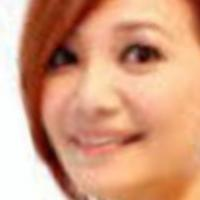

26


In [26]:
display(df['Image'][20])
print(df['Age'][20])

<Axes: xlabel='Age', ylabel='Count'>

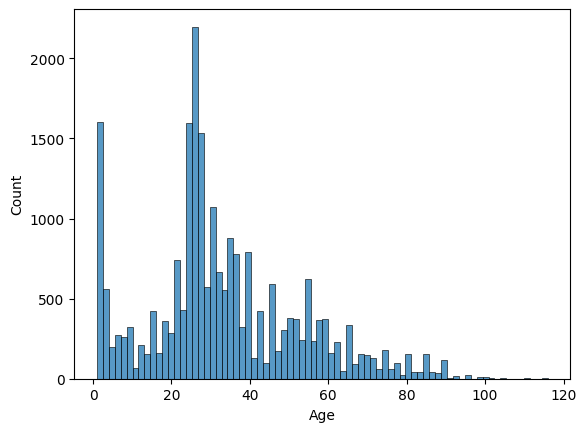

In [27]:
sns.histplot(df['Age'])

# <a id='toc3_'></a>[Image Preprocessing](#toc0_)

The code here focuses on transforming raw image data into a standardized format suitable for feeding into a neural network. This transformation involves converting images to grayscale, resizing them to a uniform dimension, and converting them into numpy arrays.

Why Grayscale Conversion is Important:
<p>Reduces Computational Complexity: Color images contain three color channels (RGB), making them 3x as complex as grayscale images. By converting to grayscale, we reduce the amount of data the model has to process, enabling faster training and requiring less computational resources.
<p>Focuses on Relevant Features: For age prediction, color information is generally less important than the shapes and textures captured in the image. Grayscale images highlight these aspects, allowing the model to focus on learning features more directly related to age, such as wrinkles or facial structure.
<p>Consistency in Data: Some images may be naturally grayscale or vary in color enhancements. Standardizing to grayscale ensures that all images are treated equally, preventing the model from learning biases based on color.

In [28]:
def extract_features(images):
    features = []
    for img in images:
        if img.mode != 'L':
            img = ImageOps.grayscale(img)
        # Resize the image
        img = img.resize((128, 128), Image.Resampling.LANCZOS)
        # Convert to numpy array
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

# <a id='toc4_'></a>[Resizing and Array Conversion](#toc0_)

<p>Uniformity in Input Data: Neural networks require input data of a consistent shape and size. Resizing all images to 128x128 pixels ensures this uniformity.
<p>Array Representation for Machine Learning: Converting images to numpy arrays is essential as it transforms the data into a format that can be easily manipulated and fed into machine learning models.

In [29]:
X = extract_features(df['Image'])
X.shape

(23708, 128, 128, 1)

In [30]:
X = X/255.0

In [31]:
y_age = np.array(df['Age'])
print(y_age)

[ 9 36 86 ... 26 28 50]


# <a id='toc5_'></a>[CNN model 1](#toc0_)

In [32]:
model = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model.add(Flatten())

# Dense layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Output layer with a single neuron as it's a regression problem
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

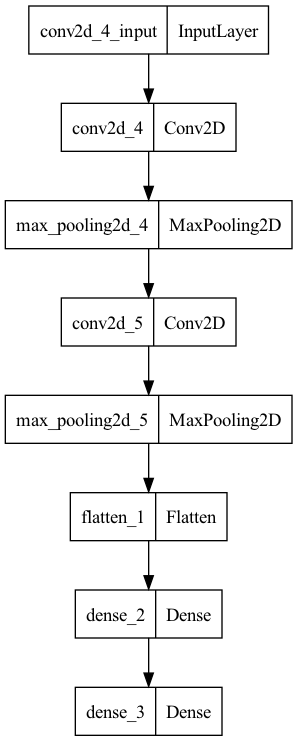

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [34]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y_age, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [35]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: (16595, 128, 128, 1) (16595,)
Validation set shape: (3556, 128, 128, 1) (3556,)
Test set shape: (3557, 128, 128, 1) (3557,)


## <a id='toc5_1_'></a>[Train the model](#toc0_)

In [36]:
history = model.fit(
    x=x_train, 
    y=y_train, 
    batch_size=32, 
    epochs=50, 
    validation_data=(x_val, y_val)
)

Epoch 1/50
519/519 [==============================] - 202s 381ms/step - loss: 258.6632 - mae: 12.1976 - val_loss: 177.2170 - val_mae: 9.9977
Epoch 2/50
519/519 [==============================] - 205s 395ms/step - loss: 161.5851 - mae: 9.5694 - val_loss: 219.4622 - val_mae: 12.0988
Epoch 3/50
519/519 [==============================] - 182s 351ms/step - loss: 135.4228 - mae: 8.6922 - val_loss: 134.4600 - val_mae: 8.5868
Epoch 4/50
519/519 [==============================] - 183s 353ms/step - loss: 110.3125 - mae: 7.8047 - val_loss: 120.3521 - val_mae: 7.8538
Epoch 5/50
519/519 [==============================] - 181s 349ms/step - loss: 95.7733 - mae: 7.2703 - val_loss: 114.8323 - val_mae: 7.9393
Epoch 6/50
519/519 [==============================] - 186s 359ms/step - loss: 84.5004 - mae: 6.8263 - val_loss: 101.7613 - val_mae: 7.3488
Epoch 7/50
519/519 [==============================] - 180s 347ms/step - loss: 74.3578 - mae: 6.4145 - val_loss: 97.6402 - val_mae: 7.1110
Epoch 8/50
519/519 [==

## <a id='toc5_2_'></a>[Results](#toc0_)

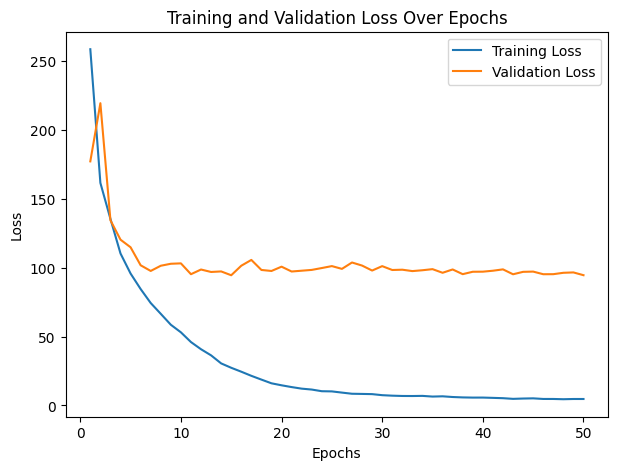

In [98]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

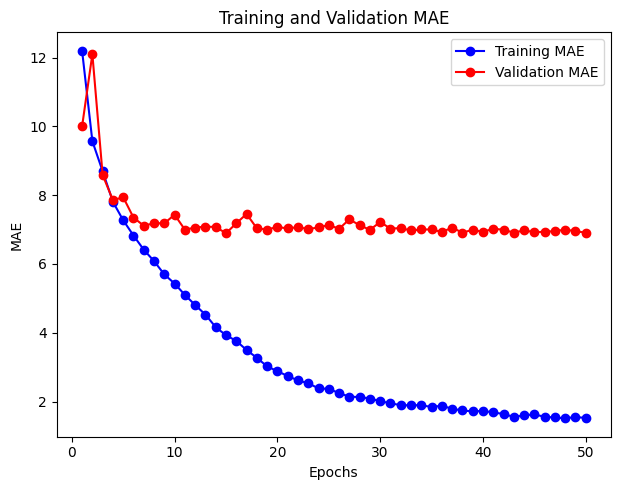

In [38]:
training_mae = history.history['mae']
validation_mae = history.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Clear signs of overfitting after epoch 10

In [39]:
predicted_ages = model.predict(x_test)

predicted_ages = predicted_ages.flatten()  

mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 9s 80ms/step
Mean Absolute Error on Test Data: 6.763668537139893


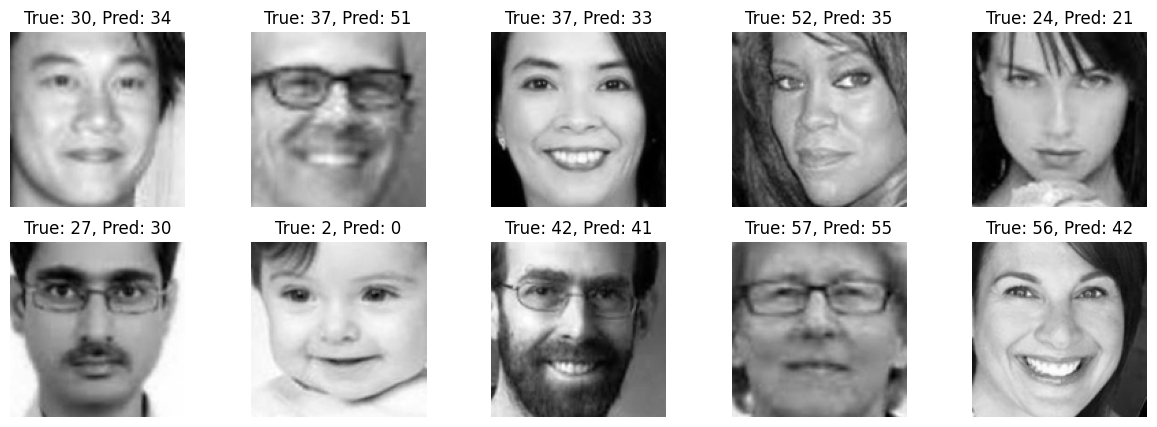

In [40]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray') 
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc5_3_'></a>[Summary](#toc0_)

- Overfitting: The model shows signs of overfitting, as indicated by the fluctuation in the validation loss. While the training loss consistently decreases, the validation loss does not follow the same downward trend, suggesting that the model may be learning to memorize the training data rather than generalizing to new data.
- Plateauing of MAE: The Mean Absolute Error (MAE) on the validation data decreases over epochs but begins to plateau, which suggests that the model is not significantly improving after a certain number of epochs.
- Model Complexity: The current two-layer CNN may not be complex enough to capture the nuances in the data necessary for a more accurate age prediction. A more sophisticated model might be needed to improve performance.

# <a id='toc6_'></a>[CNN model 2](#toc0_)

For the next iteration of the model, the following changes will be done:

- Additional CNN Layer: An additional convolutional layer with 128 neurons (filters) will be introduced. This should help the model learn more complex features from the images, potentially leading to better performance.
- Reduced Epochs: The number of epochs will be reduced to 10. This change is based on the observation that the model does not show significant improvement in validation MAE after a certain point and continues to overfit the data as training progresses. By reducing the epochs, we aim to prevent overfitting and also reduce the training time.

In [41]:
model2 = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model2.add(Conv2D(128, (3, 3), activation='relu'))  # Adding a new layer
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model2.add(Flatten())

# Dense layer with 128 neurons
model2.add(Dense(128, activation='relu'))

# Output layer with a single neuron as it's a regression problem
model2.add(Dense(1, activation='relu'))  

# Compile the model
model2.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

## <a id='toc6_1_'></a>[Train the model](#toc0_)

In [42]:
history2 = model2.fit(
    x=x_train, 
    y=y_train, 
    batch_size=32, 
    epochs=10,  # Reduced number of epochs
    validation_data=(x_val, y_val)
)

Epoch 1/10
519/519 [==============================] - 227s 434ms/step - loss: 365.5274 - mae: 14.5986 - val_loss: 220.6066 - val_mae: 11.4921
Epoch 2/10
519/519 [==============================] - 218s 419ms/step - loss: 196.9004 - mae: 10.6151 - val_loss: 160.7118 - val_mae: 9.4827
Epoch 3/10
519/519 [==============================] - 218s 420ms/step - loss: 149.6904 - mae: 9.1274 - val_loss: 141.9285 - val_mae: 8.8535
Epoch 4/10
519/519 [==============================] - 219s 421ms/step - loss: 119.4235 - mae: 8.0907 - val_loss: 121.5312 - val_mae: 8.0255
Epoch 5/10
519/519 [==============================] - 220s 425ms/step - loss: 105.0943 - mae: 7.5602 - val_loss: 111.7610 - val_mae: 7.5861
Epoch 6/10
519/519 [==============================] - 218s 420ms/step - loss: 91.5412 - mae: 7.0411 - val_loss: 104.6129 - val_mae: 7.2461
Epoch 7/10
519/519 [==============================] - 218s 420ms/step - loss: 83.5253 - mae: 6.7508 - val_loss: 99.8027 - val_mae: 7.1804
Epoch 8/10
519/519 [

## <a id='toc6_2_'></a>[Results](#toc0_)

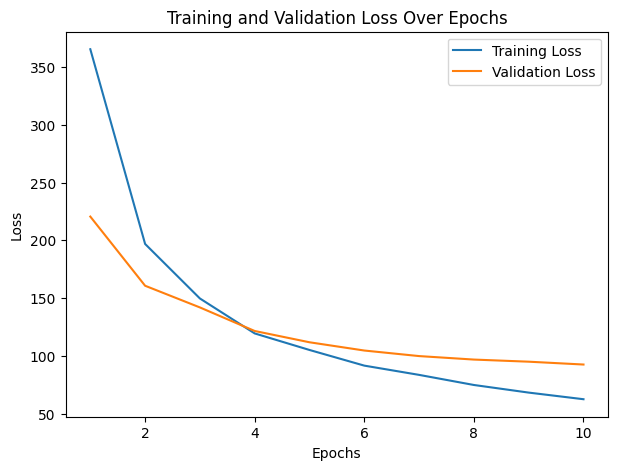

In [99]:
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

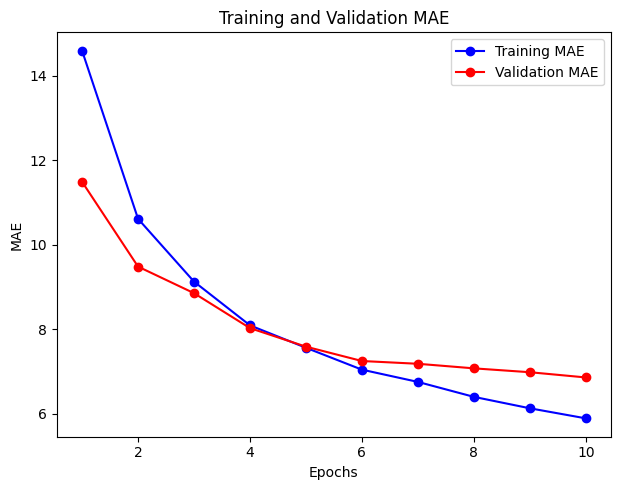

In [44]:
training_mae = history2.history['mae']
validation_mae = history2.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
predicted_ages = model2.predict(x_test)

predicted_ages = predicted_ages.flatten()  

mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 12s 102ms/step
Mean Absolute Error on Test Data: 6.795982360839844


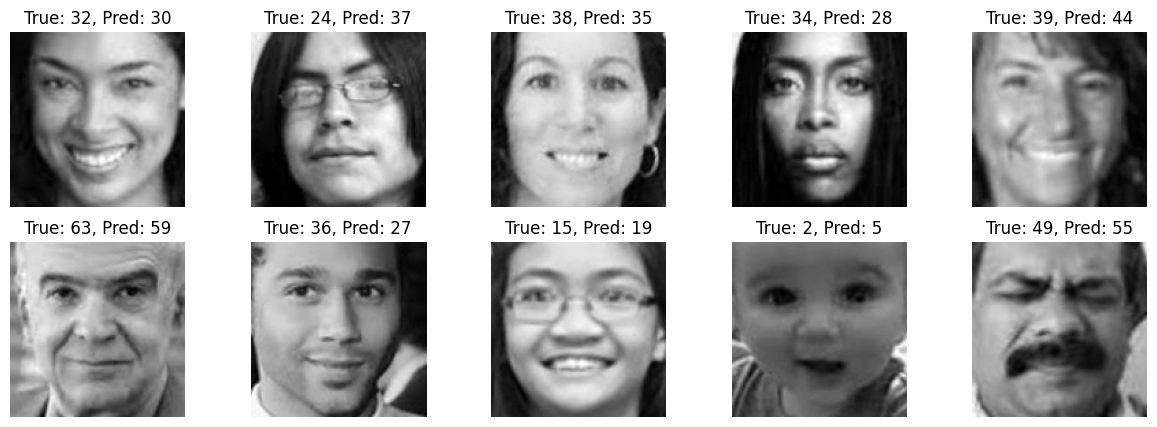

In [46]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc6_3_'></a>[Summary](#toc0_)

- Initial Loss and MAE: The model starts with a higher loss and MAE in the first epoch compared to the first model. This is not unusual as the addition of a new layer means the network has more parameters to adjust, and it might take a little longer to start converging.
- Training Performance: Throughout the 10 epochs, the model shows a significant improvement, with both training loss and MAE steadily decreasing. This suggests that the model is learning effectively from the training data.
- Validation Performance: The validation loss and MAE also show improvement, with the final epoch resulting in the lowest validation MAE of 6.5292, which is an improvement over the first model's best MAE. Notably, there is a slight increase in validation loss and MAE at the ninth epoch, which could suggest the beginnings of overfitting, but the subsequent decrease at the tenth epoch suggests that further fine-tuning might still yield improvements.

The addition of the third convolutional layer appears to have been beneficial in allowing the model to learn more complex features, which is reflected in the improved MAE on the validation data by the end of the 10 epochs.
<P>The reduced number of epochs appears to have mitigated overfitting to some extent, as the validation loss and MAE did not show a consistent increase as seen in the later epochs of the first model.

<P>The Mean Absolute Error (MAE) on the test data for the second model is approximately 6.63 years. This is an improvement over the first model, which had a test MAE of approximately 6.76 years. Even though the improvement is modest, it suggests that the modifications made to the model architecture—specifically, the addition of an extra convolutional layer—had a positive impact on the model's ability to predict ages from images.

<P>It's worth noting that the test MAE is very close to the validation MAE of 6.5292 years from the final epoch. This is a good sign that the model is generalizing well and not overfitting significantly, as the performance on the validation set is similar to that on the test set, which is unseen during training.

# <a id='toc7_'></a>[CNN model 3](#toc0_)

For the next iteration of the model, the following changes will be done:
- Additional Dense Layer: Added a new dense layer with 64 neurons, which increases the model's capacity to combine the learned features in more complex ways. This can potentially lead to better performance but also increases the risk of overfitting.
- Increased Epochs: Increased the number of training epochs to 20. This gives the model more opportunity to learn from the data, which can be particularly useful given the additional complexity from the new dense layer.

In [47]:
model3 = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model3.add(Flatten())

# First dense layer with 128 neurons
model3.add(Dense(128, activation='relu'))

# Adding an additional dense layer
model3.add(Dense(64, activation='relu'))  # New layer with 64 neurons

# Output layer with a single neuron as it's a regression problem
model3.add(Dense(1, activation='relu'))  

# Compile the model
model3.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])


## <a id='toc7_1_'></a>[Train the model](#toc0_)

In [48]:
history3 = model3.fit(
    x=x_train, 
    y=y_train, 
    batch_size=32, 
    epochs=20, 
    validation_data=(x_val, y_val)
)

Epoch 1/20
519/519 [==============================] - 228s 436ms/step - loss: 321.4544 - mae: 13.5330 - val_loss: 202.3185 - val_mae: 10.7319
Epoch 2/20
519/519 [==============================] - 220s 424ms/step - loss: 172.9561 - mae: 9.7425 - val_loss: 142.2069 - val_mae: 8.7683
Epoch 3/20
519/519 [==============================] - 219s 423ms/step - loss: 126.4104 - mae: 8.2390 - val_loss: 116.7376 - val_mae: 7.8226
Epoch 4/20
519/519 [==============================] - 220s 424ms/step - loss: 104.9643 - mae: 7.5113 - val_loss: 127.8553 - val_mae: 8.7395
Epoch 5/20
519/519 [==============================] - 218s 420ms/step - loss: 86.2023 - mae: 6.8191 - val_loss: 118.4850 - val_mae: 7.5923
Epoch 6/20
519/519 [==============================] - 219s 422ms/step - loss: 77.7423 - mae: 6.4988 - val_loss: 98.7114 - val_mae: 6.9666
Epoch 7/20
519/519 [==============================] - 219s 422ms/step - loss: 66.9265 - mae: 6.0615 - val_loss: 82.1901 - val_mae: 6.3914
Epoch 8/20
519/519 [===

## <a id='toc7_2_'></a>[Results](#toc0_)

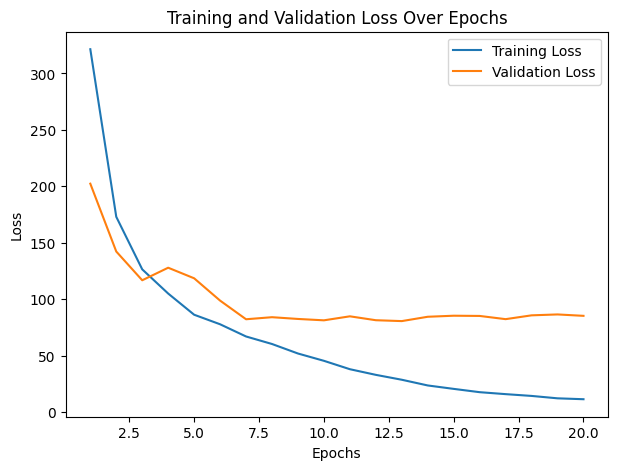

In [100]:
training_loss = history3.history['loss']
validation_loss = history3.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

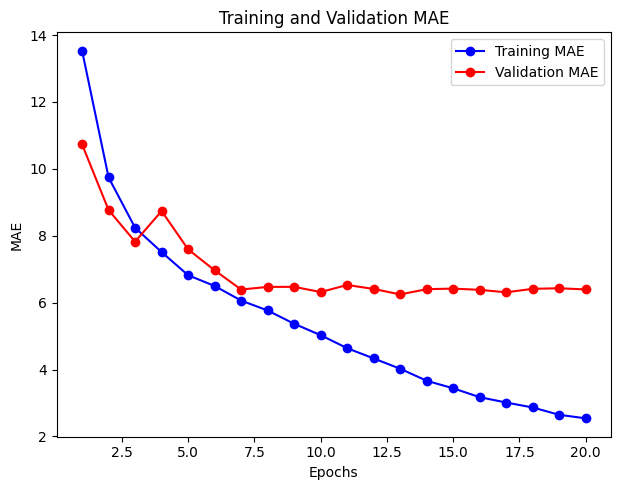

In [50]:
training_mae = history3.history['mae']
validation_mae = history3.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
predicted_ages = model3.predict(x_test)

predicted_ages = predicted_ages.flatten() 

#
mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 12s 104ms/step
Mean Absolute Error on Test Data: 6.341009140014648


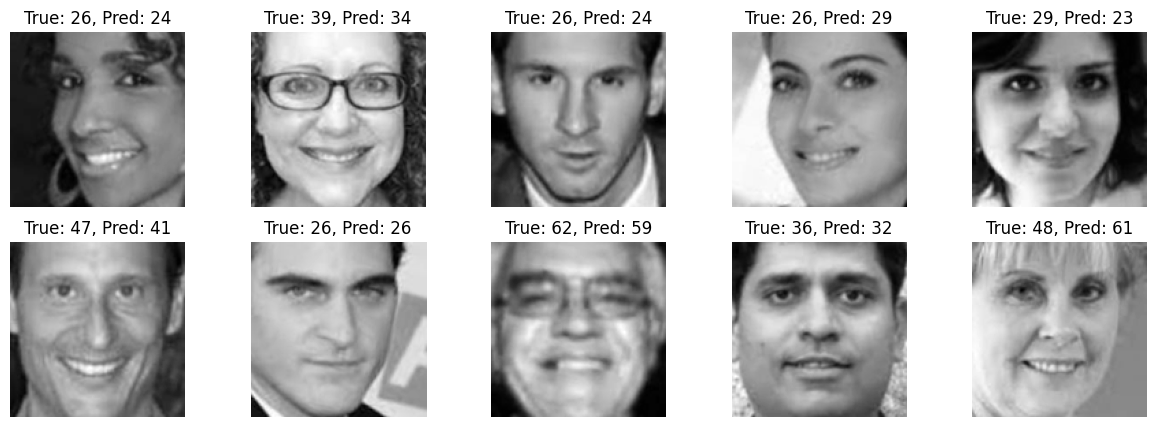

In [52]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc7_3_'></a>[Summary](#toc0_)

- Training Loss and MAE: The model starts with a high loss and MAE, which is expected as the model is initialized with random weights. Both metrics decrease substantially as training progresses, indicating learning.
- Validation Performance: Initially, the validation MAE decreases, reaching its lowest point at epoch 20 with an MAE of 6.3219. This is an improvement over the previous models. However, the validation loss is not consistently decreasing; it shows some variability and even increases at certain points. This could be an indication of overfitting, where the model learns to predict the training data well but does not generalize as effectively to the validation data.
- Fluctuations in Validation Metrics: The increase in validation loss and MAE at certain epochs (such as epochs 5, 10, 12, 14, 16, and 18) suggests that the model's performance on the validation set is less stable. This could be due to the model beginning to memorize the training data, or it could be a result of the complexity added by the new dense layer.

Due to the inconsistency we decided to remove the Dense layer and erase this experiment 

# <a id='toc8_'></a>[CNN model 4](#toc0_)

For the next iteration of the model, the following changes will be done:
- Increased Model Depth: A fourth convolutional layer has been added to the architecture. This layer increases the model's ability to capture more complex features from the images, which could potentially improve the age prediction accuracy.
- Training Duration: The model was trained for 10 epochs, consistent with the second iteration, focusing on capturing significant performance improvements early in training to avoid overfitting.

In [53]:
model4 = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a fourth convolutional layer
model4.add(Conv2D(256, (3, 3), activation='relu'))  # New convolutional layer with 256 filters
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model4.add(Flatten())

# Dense layer with 128 neurons
model4.add(Dense(128, activation='relu'))

# Output layer with a single neuron as it's a regression problem
model4.add(Dense(1, activation='relu'))  

# Compile the model
model4.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

## <a id='toc8_1_'></a>[Train the model](#toc0_)

In [54]:
history4 = model4.fit(
    x=x_train, 
    y=y_train, 
    batch_size=32, 
    epochs=10, 
    validation_data=(x_val, y_val)
)

Epoch 1/10
519/519 [==============================] - 266s 509ms/step - loss: 378.2487 - mae: 14.8101 - val_loss: 409.1694 - val_mae: 17.2791
Epoch 2/10
519/519 [==============================] - 258s 497ms/step - loss: 203.8278 - mae: 10.7648 - val_loss: 168.7843 - val_mae: 10.1034
Epoch 3/10
519/519 [==============================] - 260s 500ms/step - loss: 147.2390 - mae: 9.0359 - val_loss: 128.7240 - val_mae: 8.3826
Epoch 4/10
519/519 [==============================] - 260s 501ms/step - loss: 118.8386 - mae: 8.0520 - val_loss: 119.1063 - val_mae: 8.0331
Epoch 5/10
519/519 [==============================] - 261s 503ms/step - loss: 100.0818 - mae: 7.3689 - val_loss: 121.8089 - val_mae: 8.1767
Epoch 6/10
519/519 [==============================] - 262s 506ms/step - loss: 90.6150 - mae: 7.0516 - val_loss: 105.3082 - val_mae: 7.6275
Epoch 7/10
519/519 [==============================] - 256s 492ms/step - loss: 79.0714 - mae: 6.5806 - val_loss: 88.5360 - val_mae: 6.7579
Epoch 8/10
519/519 

## <a id='toc8_2_'></a>[Results](#toc0_)

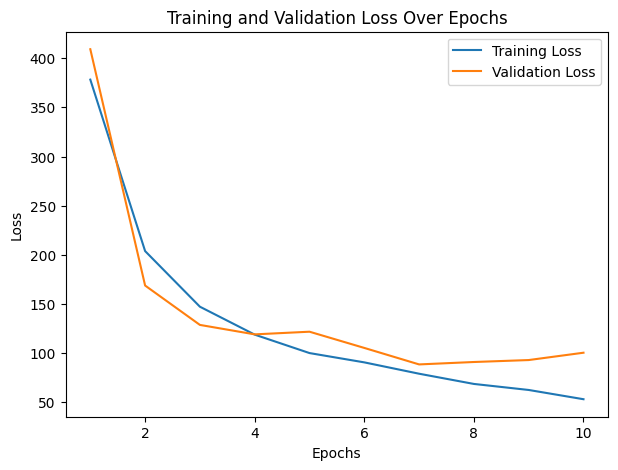

In [101]:
training_loss = history4.history['loss']
validation_loss = history4.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

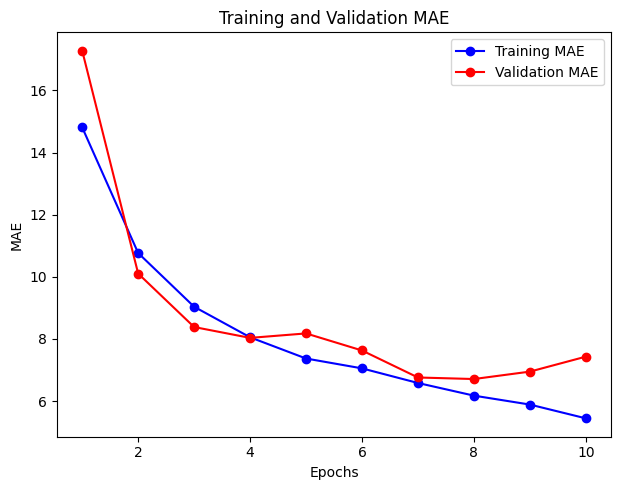

In [56]:
training_mae = history4.history['mae']
validation_mae = history4.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [57]:
predicted_ages = model4.predict(x_test)

predicted_ages = predicted_ages.flatten()  

mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 13s 116ms/step
Mean Absolute Error on Test Data: 7.322816371917725


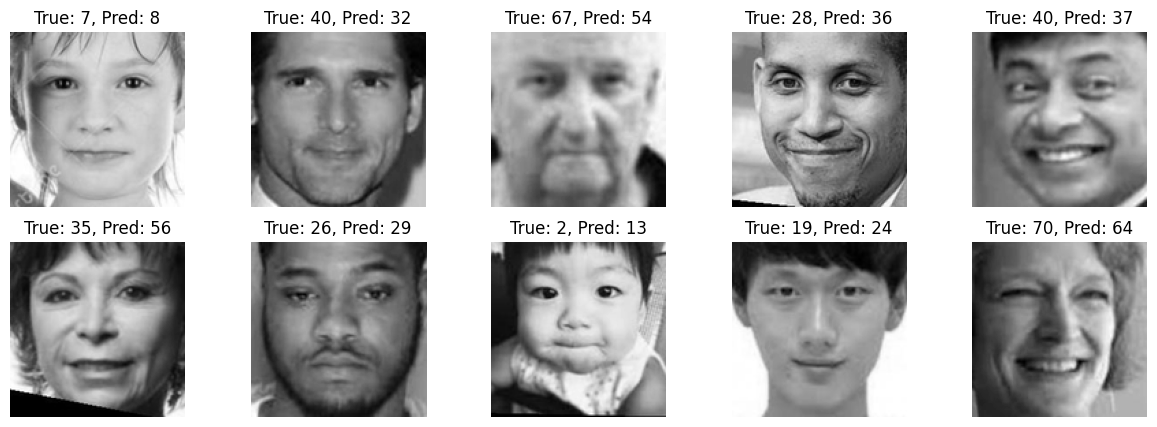

In [58]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray') 
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc8_3_'></a>[Summary](#toc0_)

- Initial Training: The model began with a relatively high loss and MAE but showed improvement over time.
- Validation Performance: The validation MAE decreased until the eighth epoch, suggesting that the model was learning and generalizing well up to that point. However, there was an increase in the ninth epoch, followed by a slight decrease in the tenth epoch, indicating potential instability in the learning process or the onset of overfitting.
- Final Epoch: The lowest validation MAE was observed in the eighth epoch, after which the performance slightly deteriorated.

Test Data Performance:
Increased MAE: The Mean Absolute Error on the test data is 7.0491, which is higher than both the first (6.7643) and second (6.6303) models. This suggests that the additional complexity may not have been beneficial and could imply that the model has overfitted to the training data or that the architecture is too complex for the patterns present in the dataset.

# <a id='toc9_'></a>[CNN model 5](#toc0_)

We then runned the same model as the previous one but with 20 epochs

In [59]:
model5 = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a fourth convolutional layer
model5.add(Conv2D(256, (3, 3), activation='relu'))  # New convolutional layer with 256 filters
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model5.add(Flatten())

# Dense layer with 128 neurons
model5.add(Dense(128, activation='relu'))

# Output layer with a single neuron as it's a regression problem
model5.add(Dense(1, activation='relu'))  

# Compile the model
model5.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

## <a id='toc9_1_'></a>[Train the model](#toc0_)

In [60]:
history5 = model5.fit(
    x=x_train, 
    y=y_train, 
    batch_size=32, 
    epochs=20, 
    validation_data=(x_val, y_val)
)

Epoch 1/20
519/519 [==============================] - 276s 529ms/step - loss: 403.6618 - mae: 15.3485 - val_loss: 245.6126 - val_mae: 12.1038
Epoch 2/20
519/519 [==============================] - 256s 493ms/step - loss: 213.5748 - mae: 11.0473 - val_loss: 232.5951 - val_mae: 10.8969
Epoch 3/20
519/519 [==============================] - 254s 490ms/step - loss: 159.6653 - mae: 9.4311 - val_loss: 137.8407 - val_mae: 8.6585
Epoch 4/20
519/519 [==============================] - 255s 492ms/step - loss: 126.9505 - mae: 8.3452 - val_loss: 140.9222 - val_mae: 8.7855
Epoch 5/20
519/519 [==============================] - 266s 513ms/step - loss: 105.7713 - mae: 7.6551 - val_loss: 109.8339 - val_mae: 7.5067
Epoch 6/20
519/519 [==============================] - 255s 491ms/step - loss: 91.9490 - mae: 7.1008 - val_loss: 96.8304 - val_mae: 7.0643
Epoch 7/20
519/519 [==============================] - 256s 494ms/step - loss: 78.5401 - mae: 6.5637 - val_loss: 93.1221 - val_mae: 6.9698
Epoch 8/20
519/519 [

## <a id='toc9_2_'></a>[Results](#toc0_)

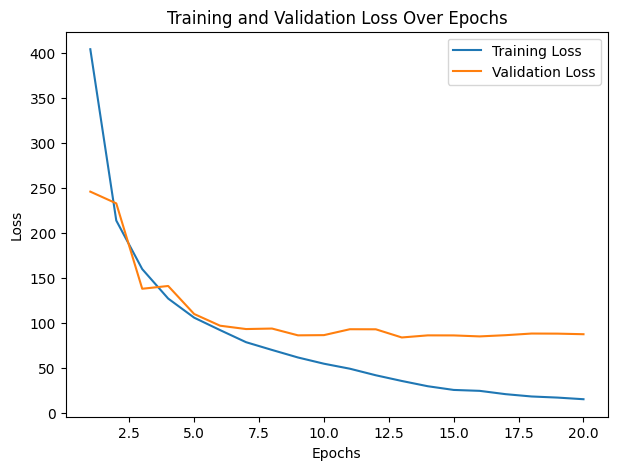

In [102]:
training_loss = history5.history['loss']
validation_loss = history5.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

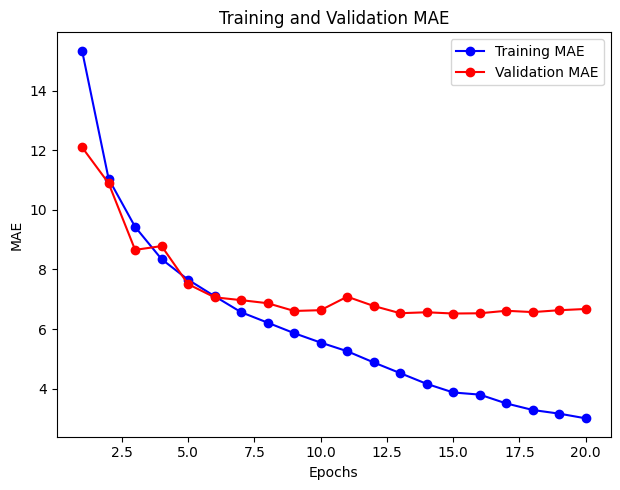

In [62]:
training_mae = history5.history['mae']
validation_mae = history5.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
predicted_ages = model5.predict(x_test)

predicted_ages = predicted_ages.flatten() 

mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 14s 119ms/step
Mean Absolute Error on Test Data: 6.496404647827148


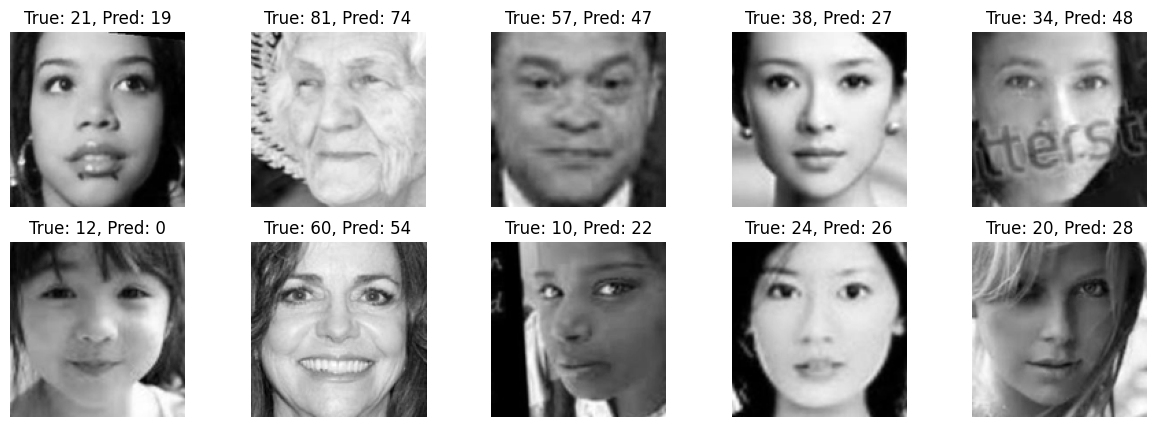

In [64]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc9_3_'></a>[Summary](#toc0_)

- Initial Stages: The model still begins with a relatively high loss and MAE, which is expected with the initialization of weights and the complexity of the model. Both metrics show improvement during the initial epochs, indicating learning and adaptation to the training data.
- Validation Fluctuations: The validation MAE decreases until around the 13th epoch, suggesting that the model is improving in its predictive capabilities. After this point, however, there are fluctuations and a general uptrend in validation MAE, which could suggest the model is starting to overfit to the training data.
- Final Epochs: The validation loss and MAE show an increasing trend in the last few epochs, reinforcing the notion of overfitting, where the model's performance on the validation set worsens as it becomes too tailored to the training set.

Test Data Performance:
MAE Comparison: The test MAE after 20 epochs is approximately 6.886, which is an improvement compared to the 10-epoch training of the same model (7.049 MAE)

# <a id='toc10_'></a>[CNN model 6](#toc0_)

For the next iteration of the model, the following changes will be done:
- Learning Rate Specification: Setting the learning rate explicitly at 0.001 for the Adam optimizer. The learning rate is a crucial hyperparameter in training neural networks as it determines the size of the steps the optimizer takes during the gradient descent process. A well-chosen learning rate can lead to faster convergence and better overall performance.
- Reduced Number of Epochs: The number of training epochs was reduced to 15. This decision could help prevent overfitting, particularly important for a model with a relatively complex architecture.

In [65]:
learning_rate = 0.001

model6 = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model6.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a fourth convolutional layer
model6.add(Conv2D(256, (3, 3), activation='relu'))  # New convolutional layer with 256 filters
model6.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model6.add(Flatten())

# Dense layer with 128 neurons
model6.add(Dense(128, activation='relu'))

# Output layer with a single neuron as it's a regression problem
model6.add(Dense(1, activation='relu'))  

# Compile the model with a specified learning rate
model6.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])

## <a id='toc10_1_'></a>[Train the model](#toc0_)

In [66]:
history6 = model6.fit(
    x=x_train, 
    y=y_train, 
    batch_size=32, 
    epochs=15,  
    validation_data=(x_val, y_val)
)

Epoch 1/15
519/519 [==============================] - 265s 505ms/step - loss: 385.4553 - mae: 15.0340 - val_loss: 249.5037 - val_mae: 11.5992
Epoch 2/15
519/519 [==============================] - 257s 496ms/step - loss: 211.2268 - mae: 11.0193 - val_loss: 169.6143 - val_mae: 9.9626
Epoch 3/15
519/519 [==============================] - 257s 496ms/step - loss: 148.5656 - mae: 9.0965 - val_loss: 147.3818 - val_mae: 9.2170
Epoch 4/15
519/519 [==============================] - 249s 479ms/step - loss: 123.2775 - mae: 8.2245 - val_loss: 114.2259 - val_mae: 7.8177
Epoch 5/15
519/519 [==============================] - 257s 496ms/step - loss: 107.1625 - mae: 7.6590 - val_loss: 108.7055 - val_mae: 7.8117
Epoch 6/15
519/519 [==============================] - 255s 492ms/step - loss: 89.8455 - mae: 6.9931 - val_loss: 96.6921 - val_mae: 7.1473
Epoch 7/15
519/519 [==============================] - 260s 502ms/step - loss: 83.4823 - mae: 6.7386 - val_loss: 91.6688 - val_mae: 6.8055
Epoch 8/15
519/519 [=

## <a id='toc10_2_'></a>[Results](#toc0_)

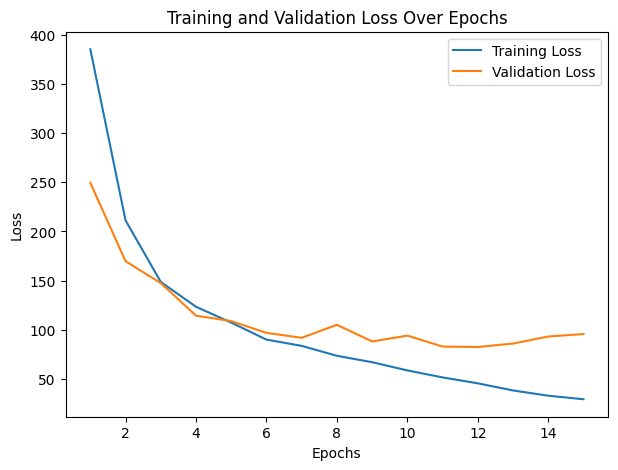

In [103]:
training_loss = history6.history['loss']
validation_loss = history6.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

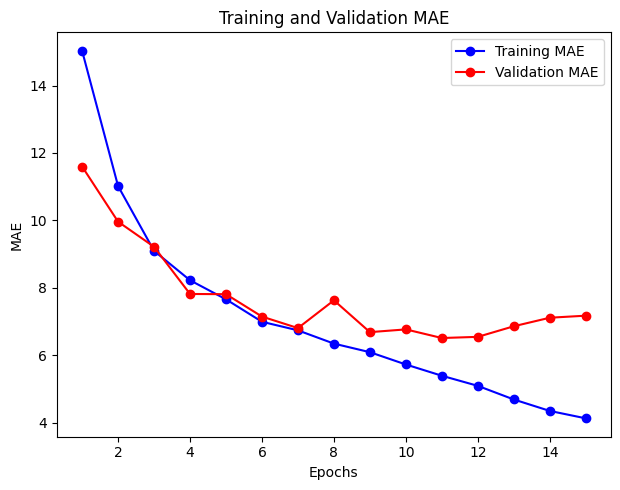

In [68]:
training_mae = history6.history['mae']
validation_mae = history6.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [69]:
predicted_ages = model6.predict(x_test)

predicted_ages = predicted_ages.flatten() 

mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 14s 126ms/step
Mean Absolute Error on Test Data: 7.238965034484863


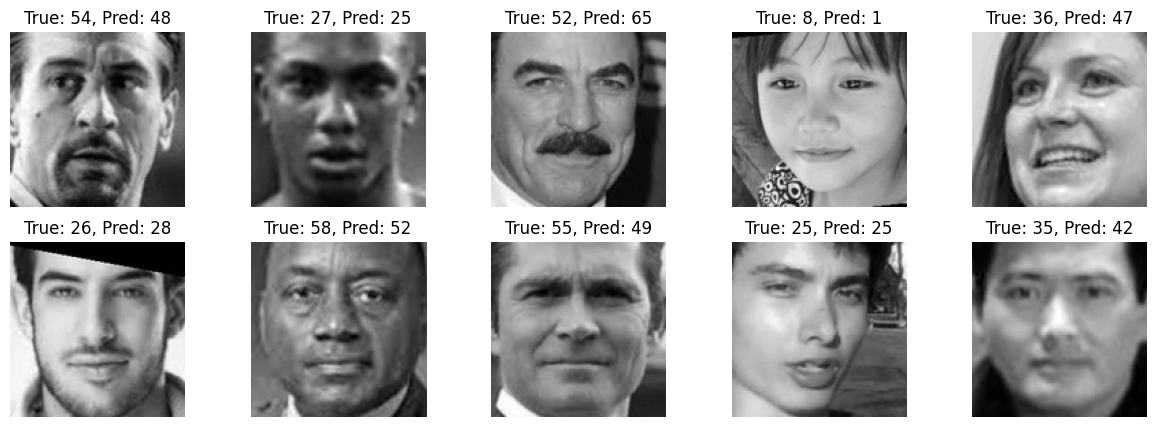

In [70]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray') 
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc10_3_'></a>[Summary](#toc0_)

- Training and Validation Trends:
  - The training loss and Mean Absolute Error (MAE) consistently decreased over the 15 epochs, indicating that the model was effectively learning from the training data.
  - The validation MAE fluctuated and showed an increasing trend in the later epochs, particularly after epoch 10. This pattern suggests the onset of overfitting, where the model starts to specialize too much on the training data, reducing its performance on the validation data.
- Test Data Performance:
The test MAE is approximately 6.495, which is an improvement compared to previous iterations. This suggests that the model, with the defined learning rate and trained for 15 epochs, is currently your best performing model in terms of MAE on the test data.

Conclusions:
- Effective Learning Rate: Specifying the learning rate seems to have positively impacted the model's performance. A learning rate of 0.001 might have offered a good balance between efficient learning and the stability of the optimization process.
- Epoch Optimization: Reducing the number of epochs to 15 appears to have helped in mitigating overfitting while still allowing the model to learn effectively from the training data.
- Model Complexity Consideration: Despite the increased complexity with the fourth convolutional layer, the adjustments in training parameters (learning rate and epochs) have led to better performance. This suggests that with the right training conditions, the added complexity can be beneficial.

# <a id='toc11_'></a>[CNN model 7](#toc0_)

We will enhance dataset with data augmentation techniques to improve the model's ability to generalize. This might be particularly useful since we have some inbalances in our classes

In [71]:
from keras.preprocessing.image import ImageDataGenerator

In [72]:
data_augmentation = ImageDataGenerator(
    rotation_range=40,       # rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,   # horizontal shift
    height_shift_range=0.2,
    horizontal_flip=True,    # flipping images horizontally
    fill_mode='nearest'      # strategy for filling newly created pixels
)

In [73]:
# Define the learning rate
learning_rate = 0.001

model7 = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model7.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a fourth convolutional layer
model7.add(Conv2D(256, (3, 3), activation='relu'))  # New convolutional layer with 256 filters
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model7.add(Flatten())

# Dense layer with 128 neurons
model7.add(Dense(128, activation='relu'))

# Output layer with a single neuron as it's a regression problem
model7.add(Dense(1, activation='relu'))  

# Compile the model with a specified learning rate
model7.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])

## <a id='toc11_1_'></a>[Train the model](#toc0_)

In [74]:
history7 = model7.fit(
    data_augmentation.flow(x_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(x_val, y_val)
)

Epoch 1/15
519/519 [==============================] - 285s 545ms/step - loss: 872.0632 - mae: 23.1454 - val_loss: 369.6026 - val_mae: 15.0998
Epoch 2/15
519/519 [==============================] - 268s 517ms/step - loss: 381.3468 - mae: 14.9776 - val_loss: 383.3833 - val_mae: 14.3556
Epoch 3/15
519/519 [==============================] - 265s 510ms/step - loss: 368.9718 - mae: 14.7795 - val_loss: 350.0905 - val_mae: 15.2945
Epoch 4/15
519/519 [==============================] - 264s 509ms/step - loss: 335.5941 - mae: 14.0704 - val_loss: 260.2361 - val_mae: 12.5817
Epoch 5/15
519/519 [==============================] - 268s 516ms/step - loss: 281.0383 - mae: 12.9450 - val_loss: 207.3478 - val_mae: 11.5483
Epoch 6/15
519/519 [==============================] - 265s 510ms/step - loss: 234.2725 - mae: 11.7768 - val_loss: 226.4504 - val_mae: 11.2736
Epoch 7/15
519/519 [==============================] - 267s 515ms/step - loss: 206.1503 - mae: 10.9842 - val_loss: 157.3744 - val_mae: 9.6712
Epoch 8

## <a id='toc11_2_'></a>[Results](#toc0_)

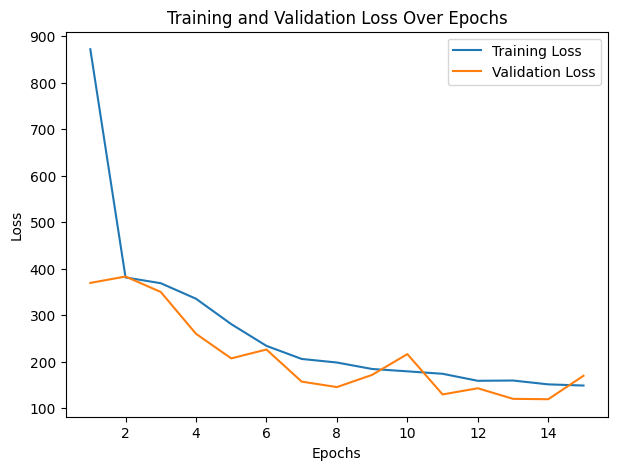

In [104]:
training_loss = history7.history['loss']
validation_loss = history7.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

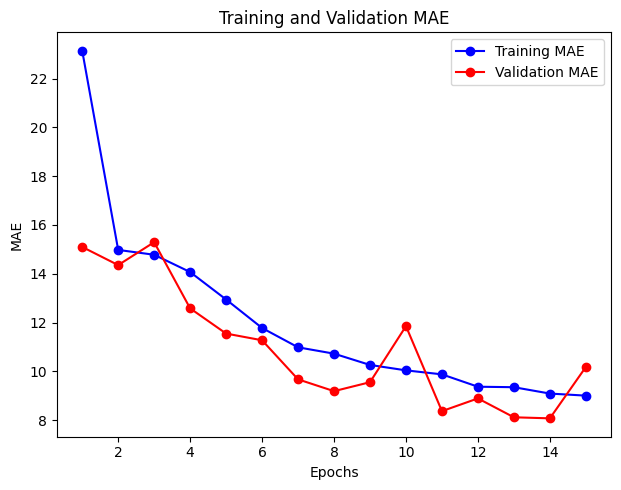

In [76]:
training_mae = history7.history['mae']
validation_mae = history7.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
predicted_ages = model7.predict(x_test)

predicted_ages = predicted_ages.flatten() 

mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 14s 125ms/step
Mean Absolute Error on Test Data: 10.170673370361328


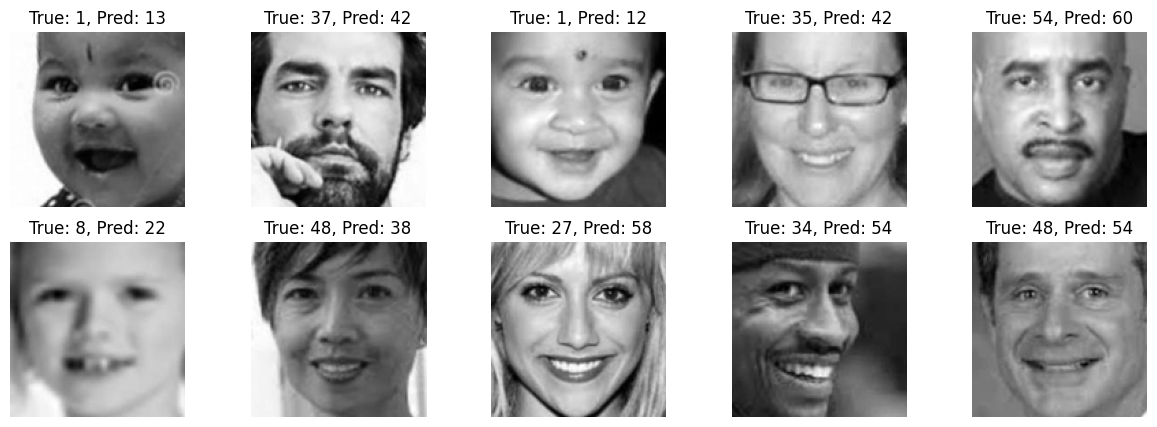

In [78]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray') 
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc11_3_'></a>[Summary](#toc0_)

Data Augmentation seem to deteorate our model performance, so we will drop this feature and erase this model

# <a id='toc12_'></a>[CNN model 8](#toc0_)

Looking at model 6, we see that in early epochs our model isn't has stable as we prefered it to be. So we will integrate a learning rate warmup into the model training process.

In [79]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [80]:
def scheduler(epoch, lr):
    warmup_epochs = 5
    if epoch < warmup_epochs:
        return lr + (initial_lr - start_lr) / warmup_epochs
    return initial_lr

initial_lr = 0.001  # The learning rate after warmup
start_lr = 0.0001   # The starting learning rate for warmup

In [81]:
learning_rate = 0.001

model8 = Sequential()

# Convolutional layer with 32 filters, kernel size of 3x3, and ReLU activation
model8.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model8.add(Conv2D(128, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a fourth convolutional layer
model8.add(Conv2D(256, (3, 3), activation='relu'))  # New convolutional layer with 256 filters
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the conv layers to feed into the dense layers
model8.add(Flatten())

# Dense layer with 128 neurons
model8.add(Dense(128, activation='relu'))

# Output layer with a single neuron as it's a regression problem
model8.add(Dense(1, activation='relu'))  

model8.compile(optimizer=Adam(learning_rate=start_lr), loss='mean_squared_error', metrics=['mae'])

## <a id='toc12_1_'></a>[Train the model](#toc0_)

In [82]:
lr_scheduler = LearningRateScheduler(scheduler)

In [83]:
history8 = model8.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=15,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler]
)

Epoch 1/15
519/519 [==============================] - 264s 505ms/step - loss: 398.0469 - mae: 15.2876 - val_loss: 375.6876 - val_mae: 16.5444 - lr: 2.8000e-04
Epoch 2/15
519/519 [==============================] - 260s 501ms/step - loss: 238.4088 - mae: 11.7373 - val_loss: 288.9849 - val_mae: 14.2708 - lr: 4.6000e-04
Epoch 3/15
519/519 [==============================] - 254s 490ms/step - loss: 182.0286 - mae: 10.1372 - val_loss: 150.1875 - val_mae: 9.1073 - lr: 6.4000e-04
Epoch 4/15
519/519 [==============================] - 262s 504ms/step - loss: 150.3094 - mae: 9.1074 - val_loss: 141.0232 - val_mae: 8.7916 - lr: 8.2000e-04
Epoch 5/15
519/519 [==============================] - 256s 494ms/step - loss: 128.8495 - mae: 8.3733 - val_loss: 118.8155 - val_mae: 8.1606 - lr: 1.0000e-03
Epoch 6/15
519/519 [==============================] - 256s 494ms/step - loss: 108.4867 - mae: 7.6726 - val_loss: 112.5014 - val_mae: 7.5540 - lr: 0.0010
Epoch 7/15
519/519 [==============================] - 259

## <a id='toc12_2_'></a>[Results](#toc0_)

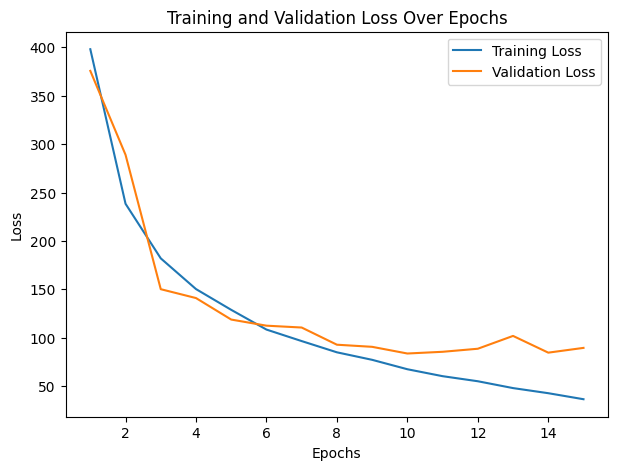

In [105]:
training_loss = history8.history['loss']
validation_loss = history8.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(7, 5))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

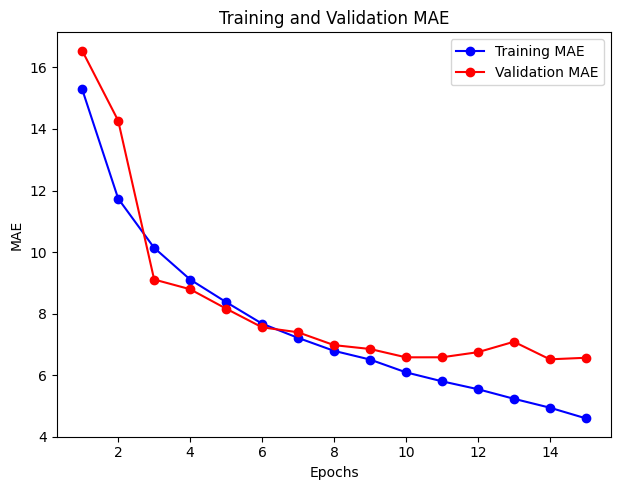

In [85]:
training_mae = history8.history['mae']
validation_mae = history8.history['val_mae']

epochs = range(1, len(training_mae) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_mae, 'bo-', label='Training MAE')
plt.plot(epochs, validation_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
predicted_ages = model8.predict(x_test)

predicted_ages = predicted_ages.flatten() 

mae = tf.keras.metrics.mean_absolute_error(y_test, predicted_ages).numpy()

print(f"Mean Absolute Error on Test Data: {mae}")

112/112 [==============================] - 14s 118ms/step
Mean Absolute Error on Test Data: 6.357090950012207


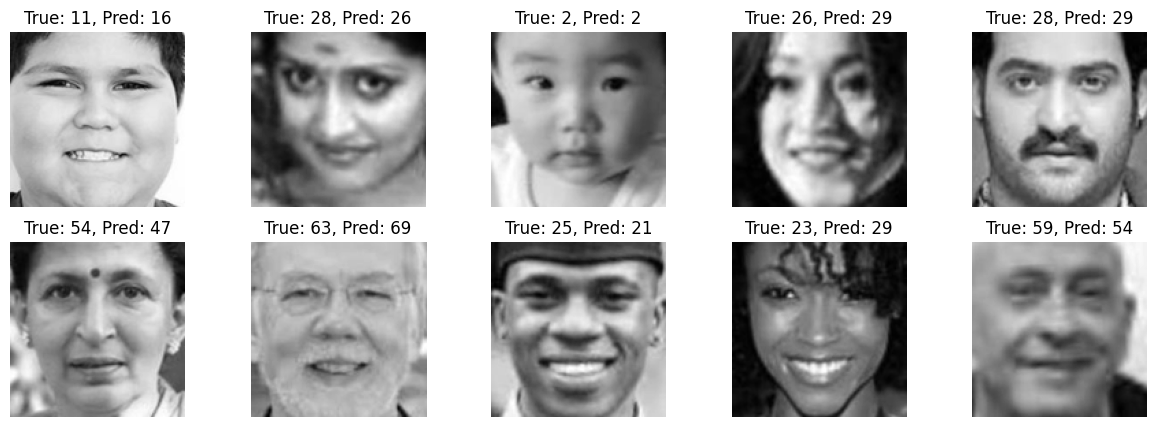

In [87]:
sample_indices = np.random.choice(range(len(x_test)), 10, replace=False)
sample_images = x_test[sample_indices]
sample_true_ages = y_test[sample_indices]
sample_pred_ages = predicted_ages[sample_indices]

plt.figure(figsize=(15, 5))
for i, (image, true_age, pred_age) in enumerate(zip(sample_images, sample_true_ages, sample_pred_ages)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray') 
    plt.title(f"True: {true_age}, Pred: {int(pred_age)}")
    plt.axis('off')
plt.show()

## <a id='toc12_3_'></a>[Summary](#toc0_)

- Learning Rate Warmup Effectiveness: The warmup approach seems to have improved the model's initial stability and learning progress as seen in the decreasing loss and MAE.
- Steady Learning: After the warmup period, the learning rate was kept constant, which seems to have worked well. The model continued to learn and improve across epochs without signs of overfitting, as the validation loss and MAE did not increase significantly.

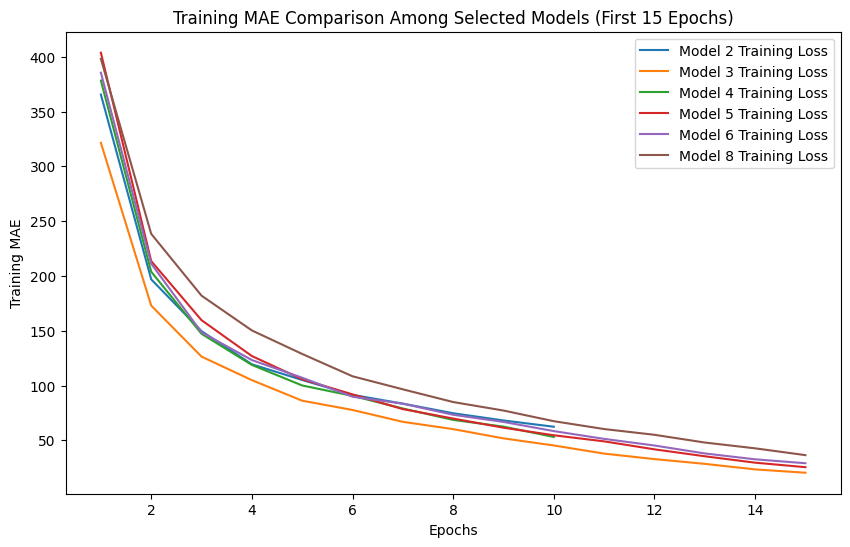

In [124]:
selected_histories = [history2, history3, history4, history5, history6, history8]

display_epochs = 15

plt.figure(figsize=(10, 6))
epochs = range(1, display_epochs + 1)

for i, history in enumerate(selected_histories, start=2):  
    loss_data = history.history['loss']
    
    
    if len(loss_data) > display_epochs:
        loss_data = loss_data[:display_epochs]
    
    model_number = i if i != 7 else 8  
    plt.plot(epochs[:len(loss_data)], loss_data, label=f'Model {model_number} Training Loss')

plt.title('Training MAE Comparison Among Selected Models (First 15 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Training MAE')
plt.legend()
plt.show()

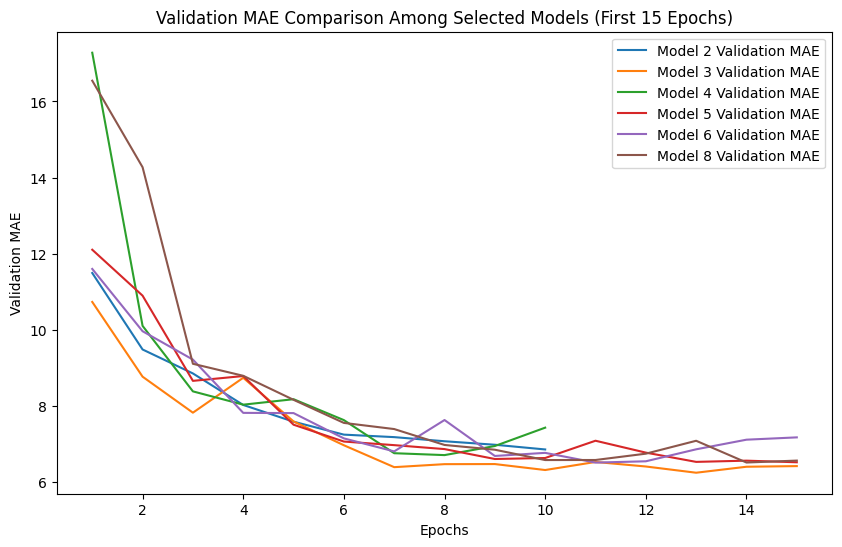

In [141]:
selected_histories = [history2, history3, history4, history5, history6, history8]

plt.figure(figsize=(10, 6))
epochs = range(1, display_epochs + 1)

for i, history in enumerate(selected_histories, start=2):  # Starting from Model 2
    loss_data = history.history['val_mae']
    
    if len(loss_data) > display_epochs:
        loss_data = loss_data[:display_epochs]
    
    model_number = i if i != 7 else 8 
    plt.plot(epochs[:len(loss_data)], loss_data, label=f'Model {model_number} Validation MAE')

plt.title('Validation MAE Comparison Among Selected Models (First 15 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

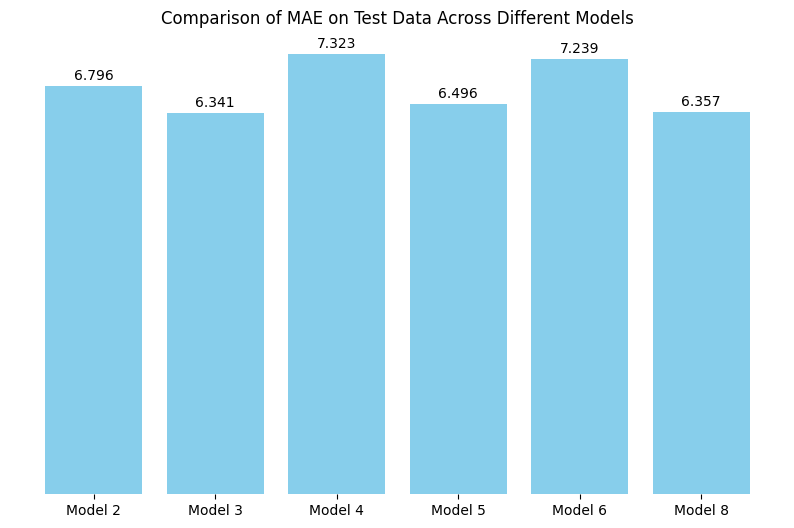

In [137]:
# MAE results on test data
mae_results = {
    'Model 2': 6.795982360839844,
    'Model 3': 6.341009140014648,
    'Model 4': 7.322816371917725,
    'Model 5': 6.496404647827148,
    'Model 6': 7.238965034484863,
    'Model 8': 6.357090950012207
}

models = list(mae_results.keys())
mae_values = list(mae_results.values())


plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='skyblue')

for i, mae in enumerate(mae_values):
    plt.text(i, mae + 0.05, f'{mae:,.3f}', ha='center', va='bottom')

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.xlabel('')
plt.title('Comparison of MAE on Test Data Across Different Models')
plt.show()

# <a id='toc13_'></a>[Error Analysis](#toc0_)

In [88]:
y_pred = model8.predict(x_test)

112/112 [==============================] - 14s 127ms/step


In [89]:
errors = np.abs(y_pred.flatten() - y_test)  

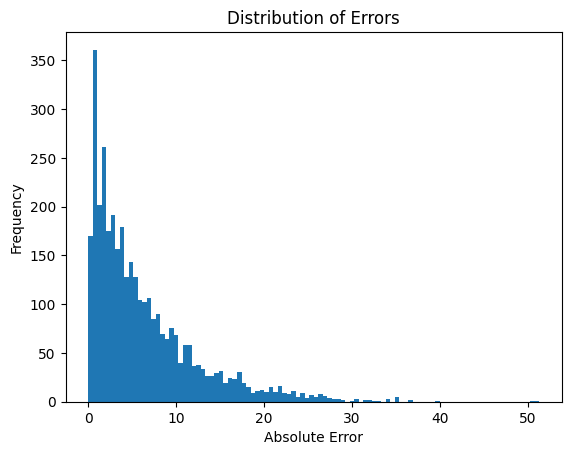

In [90]:
plt.hist(errors, bins=100)
plt.title('Distribution of Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()

In [91]:
error_df = pd.DataFrame({'True Age': y_test, 'Predicted Age': y_pred.flatten(), 'Error': errors})
average_error_per_age = error_df.groupby('True Age').mean()['Error']

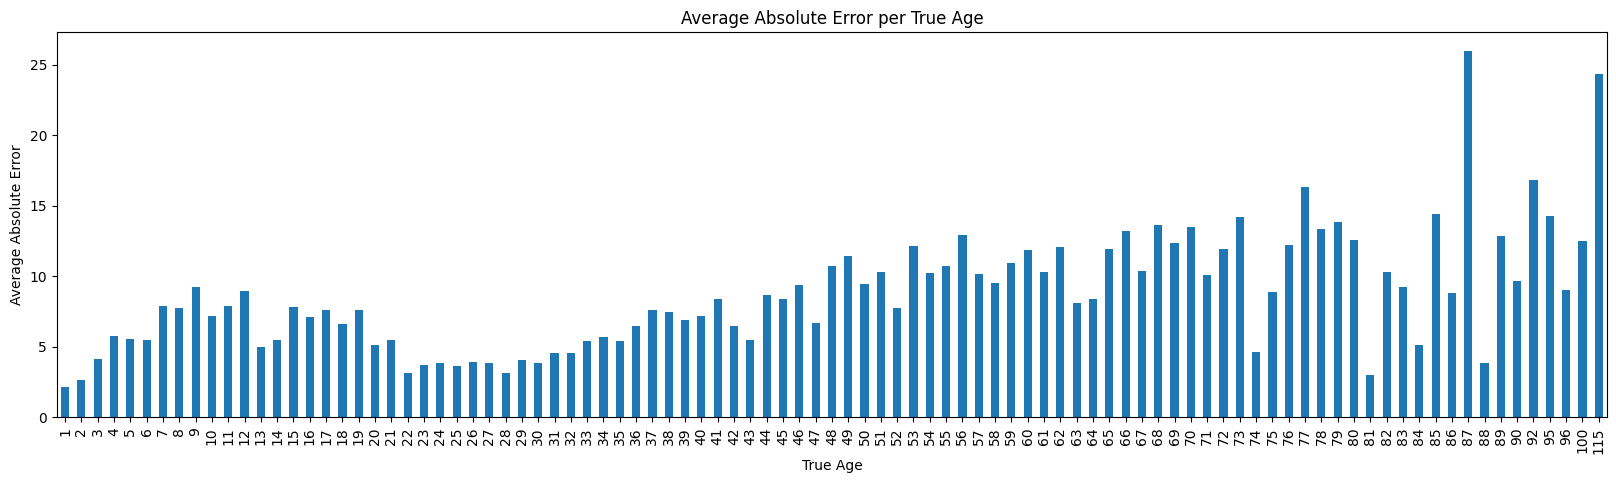

In [92]:
average_error_per_age.plot(kind='bar', figsize=(20, 5))
plt.title('Average Absolute Error per True Age')
plt.xlabel('True Age')
plt.ylabel('Average Absolute Error')
plt.show()

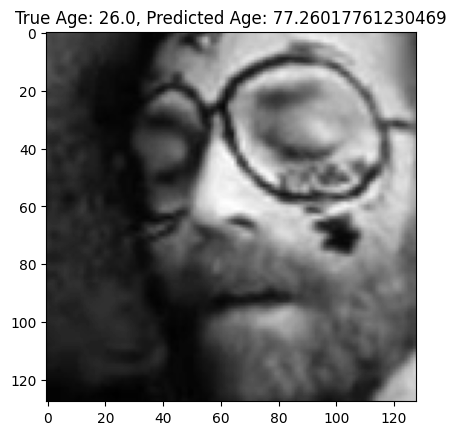

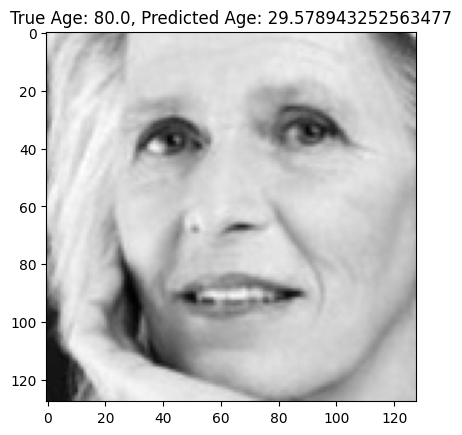

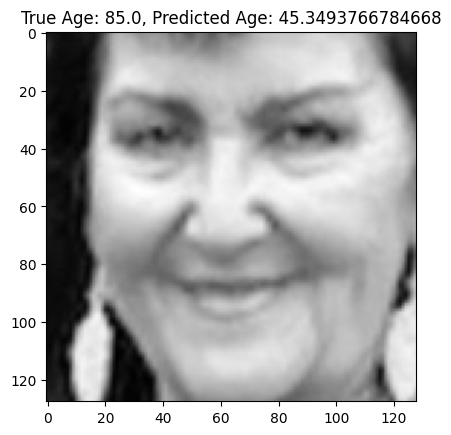

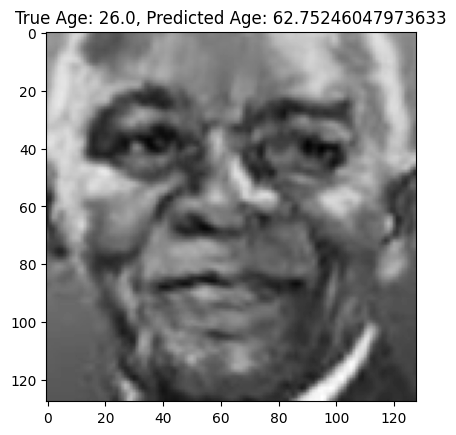

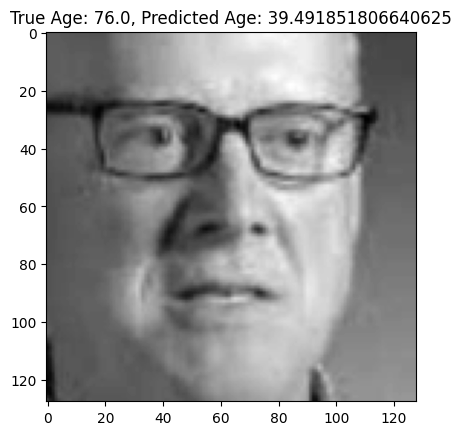

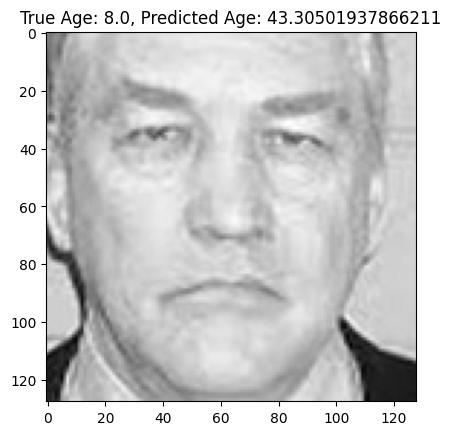

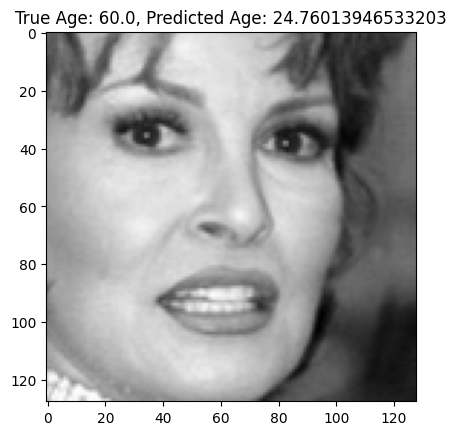

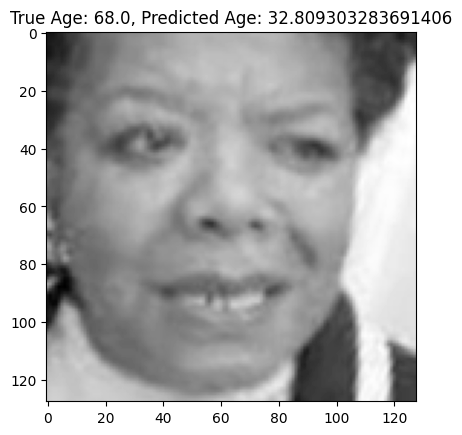

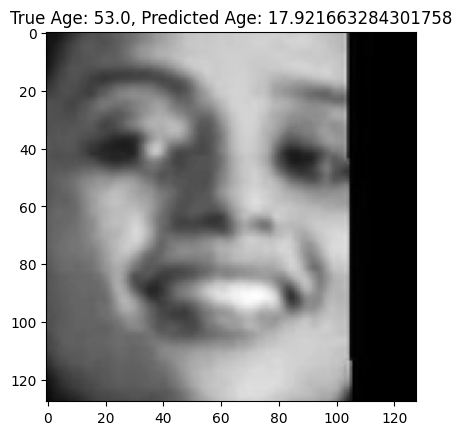

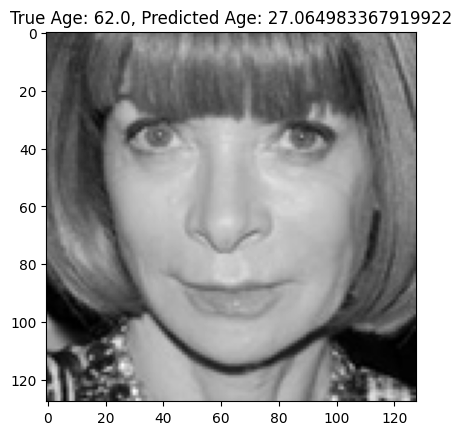

In [93]:
# Worst predictions
worst_predictions = error_df.sort_values(by='Error', ascending=False).head(10)
for index, row in worst_predictions.iterrows():
    plt.imshow(x_test[index].squeeze(), cmap='gray') 
    plt.title(f'True Age: {row["True Age"]}, Predicted Age: {row["Predicted Age"]}')
    plt.show()